In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing

In [2]:
AutoData = pd.read_csv("auto-mpg-data.csv",  header=0)

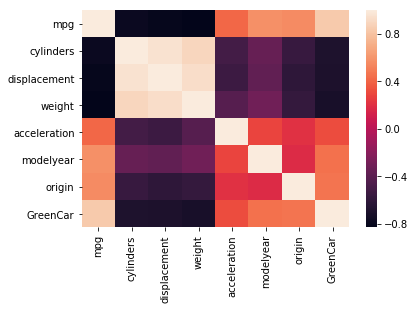

In [3]:
import seaborn as sns
corr = AutoData.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [99]:
# function for min-max normalization of stock
def normalize(x_data, y_data):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    x_data['cylinders'] = min_max_scaler.fit_transform(x_data.cylinders.values.reshape(-1,1))
    x_data['weight'] = min_max_scaler.fit_transform(x_data.weight.values.reshape(-1,1))
    y_data['mpg'] = min_max_scaler.fit_transform(y_data.mpg.values.reshape(-1,1))
    return x_data, y_data, min_max_scaler
x_data = AutoData.loc[:,['cylinders','weight']]
y_data = AutoData.loc[:,['mpg']]
true_cls = AutoData.loc[:,['GreenCar']]
#x_data, y_data, scaler = normalize(x_data, y_data)

In [100]:
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(x_data, true_cls, test_size=0.20, random_state=33)
#x_tr, x_te, y_tr, y_te = train_test_split(x_data, y_data, test_size=0.20, random_state=33)
true_cls.describe()

,GreenCar
count,398.000000
mean,0.434673
std,0.496338
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [101]:
import math

def sigmoid(x):
    try:
        prob = 1 / (1 + math.exp(-x))
    except OverflowError:
        print("Overflow: math.exp(-{0})".format(x))
        prob = 0.00001
    return prob

In [102]:
# Make a prediction with weights
def predictClass(_x, y, bias,weights):
    activation = bias #Bias
    for i in range(len(_x)):
        activation += weights[i] * _x[i]
    ccls = round(sigmoid(activation),2)
    print ("actual:predicted{0}:{1}".format(y,ccls))
    return 1 if ccls >= 0.7 else 0  # Threashold

In [106]:
# Estimate Perceptron weights using stochastic gradient descent
def train(x,y, l_rate, n_epoch):
    weights = [0.0 for i in range(len(x[0]))]
    bias = 1.0 ;
    for epoch in range(n_epoch):
        sum_error = 0.0
        index=0
        accurate =0
        accuracy = 0
        for _x in x:
            #print("x={0},y={1}".format(_x,y[index]))
            prediction = predictClass(_x, y[index], bias, weights)
            
            error = y[index] - prediction
            #print("error:", error)
            if (error ==0):
                accurate+=1
            accuracy = (accurate/(index+1))
            error = (1 - accuracy)*error
            bias = bias + l_rate * error
            for i in range(len(_x)):
                weights[i] = weights[i] + l_rate * error * _x[i]
            #print("weights=", weights)
            index+=1
        #print('>epoch=%d, lrate=%.3f, error=%.3f, obs=%.3f accuracy=%3d' 
         #         % (epoch, l_rate, sum_error/len(x), len(x), accurate/len(x)*100))
    return bias, weights

bias, weights = train(x_tr.values,y_tr.values, 0.00001, 20)

actual:predicted[0]:0.73
actual:predicted[1]:0.0
actual:predicted[1]:0.0
actual:predicted[1]:0.0
actual:predicted[0]:1.0
actual:predicted[0]:1.0
actual:predicted[0]:1.0
actual:predicted[0]:0.0
actual:predicted[0]:0.0
actual:predicted[0]:0.0
actual:predicted[0]:0.0
actual:predicted[1]:0.0
actual:predicted[1]:0.0
actual:predicted[1]:0.0
actual:predicted[0]:0.0
actual:predicted[0]:0.0
actual:predicted[1]:0.0
actual:predicted[1]:0.0
actual:predicted[1]:0.0
actual:predicted[1]:0.0
actual:predicted[0]:0.0
actual:predicted[0]:1.0
actual:predicted[1]:1.0
actual:predicted[0]:1.0
actual:predicted[0]:1.0
actual:predicted[1]:1.0
actual:predicted[0]:1.0
actual:predicted[1]:1.0
actual:predicted[0]:1.0
actual:predicted[1]:1.0
actual:predicted[1]:0.0
actual:predicted[1]:0.0
actual:predicted[1]:0.0
actual:predicted[0]:0.0
actual:predicted[1]:0.0
actual:predicted[0]:0.0
actual:predicted[0]:0.0
actual:predicted[1]:0.0
actual:predicted[1]:0.0
actual:predicted[1]:0.0
actual:predicted[1]:0.0
actual:predicte

Overflow: math.exp(-[-3871.88430356])
actual:predicted[0]:0.0
Overflow: math.exp(-[-3935.62953568])
actual:predicted[0]:0.0
Overflow: math.exp(-[-3967.58304532])
actual:predicted[1]:0.0
Overflow: math.exp(-[-3986.40275923])
actual:predicted[1]:0.0
Overflow: math.exp(-[-3975.70757963])
actual:predicted[1]:0.0
Overflow: math.exp(-[-3928.21742097])
actual:predicted[0]:0.0
Overflow: math.exp(-[-3886.08871569])
actual:predicted[0]:0.0
Overflow: math.exp(-[-3822.13197235])
actual:predicted[0]:0.0
Overflow: math.exp(-[-3783.64622327])
actual:predicted[1]:0.0
Overflow: math.exp(-[-3722.18757573])
actual:predicted[1]:0.0
Overflow: math.exp(-[-3617.49408206])
actual:predicted[1]:0.0
Overflow: math.exp(-[-3467.53758275])
actual:predicted[0]:0.0
Overflow: math.exp(-[-3254.14573156])
actual:predicted[0]:0.0
Overflow: math.exp(-[-3122.26296328])
actual:predicted[1]:0.0
Overflow: math.exp(-[-2865.90375636])
actual:predicted[0]:0.0
Overflow: math.exp(-[-2752.85952472])
actual:predicted[1]:0.0
Overflow

Overflow: math.exp(-[-2323.78349895])
actual:predicted[1]:0.0
Overflow: math.exp(-[-2191.11271551])
actual:predicted[1]:0.0
Overflow: math.exp(-[-2049.92732946])
actual:predicted[1]:0.0
Overflow: math.exp(-[-1672.2140357])
actual:predicted[0]:0.0
Overflow: math.exp(-[-1329.06027676])
actual:predicted[0]:0.0
Overflow: math.exp(-[-1182.96437511])
actual:predicted[1]:0.0
Overflow: math.exp(-[-940.88728722])
actual:predicted[0]:0.0
Overflow: math.exp(-[-725.98297783])
actual:predicted[0]:0.0
actual:predicted[1]:0.0
actual:predicted[0]:0.0
actual:predicted[1]:1.0
actual:predicted[0]:1.0
actual:predicted[1]:1.0
actual:predicted[1]:1.0
actual:predicted[1]:1.0
actual:predicted[1]:1.0
actual:predicted[0]:1.0
actual:predicted[1]:1.0
actual:predicted[0]:1.0
actual:predicted[0]:1.0
actual:predicted[1]:1.0
actual:predicted[1]:1.0
actual:predicted[1]:1.0
actual:predicted[1]:1.0
actual:predicted[0]:1.0
actual:predicted[1]:1.0
actual:predicted[0]:1.0
actual:predicted[0]:1.0
actual:predicted[1]:1.0
act

actual:predicted[1]:1.0
actual:predicted[0]:1.0
actual:predicted[0]:1.0
actual:predicted[1]:1.0
actual:predicted[1]:1.0
actual:predicted[1]:1.0
actual:predicted[0]:0.0
actual:predicted[0]:0.0
Overflow: math.exp(-[-813.59535954])
actual:predicted[0]:0.0
Overflow: math.exp(-[-1090.2061309])
actual:predicted[1]:0.0
Overflow: math.exp(-[-1308.51386517])
actual:predicted[1]:0.0
Overflow: math.exp(-[-1549.28515943])
actual:predicted[1]:0.0
Overflow: math.exp(-[-1772.02703499])
actual:predicted[0]:0.0
Overflow: math.exp(-[-2088.99408228])
actual:predicted[0]:0.0
Overflow: math.exp(-[-2284.88912134])
actual:predicted[1]:0.0
Overflow: math.exp(-[-2549.6668754])
actual:predicted[0]:0.0
Overflow: math.exp(-[-2666.42353725])
actual:predicted[1]:0.0
Overflow: math.exp(-[-2884.59954519])
actual:predicted[0]:0.0
Overflow: math.exp(-[-3007.50770563])
actual:predicted[1]:0.0
Overflow: math.exp(-[-3104.34519793])
actual:predicted[1]:0.0
Overflow: math.exp(-[-3254.23601057])
actual:predicted[0]:0.0
Overf

Overflow: math.exp(-[-1181.16573111])
actual:predicted[1]:0.0
Overflow: math.exp(-[-1593.32763551])
actual:predicted[1]:0.0
Overflow: math.exp(-[-2061.28385959])
actual:predicted[0]:0.0
Overflow: math.exp(-[-2461.74498042])
actual:predicted[1]:0.0
Overflow: math.exp(-[-3117.79821889])
actual:predicted[0]:0.0
Overflow: math.exp(-[-3721.01537664])
actual:predicted[0]:0.0
Overflow: math.exp(-[-4173.99934277])
actual:predicted[1]:0.0
Overflow: math.exp(-[-4686.04760689])
actual:predicted[0]:0.0
Overflow: math.exp(-[-5258.41208559])
actual:predicted[1]:0.0
Overflow: math.exp(-[-5720.37292601])
actual:predicted[1]:0.0
Overflow: math.exp(-[-6131.3590296])
actual:predicted[0]:0.0
Overflow: math.exp(-[-6372.41605838])
actual:predicted[1]:0.0
Overflow: math.exp(-[-6620.53083702])
actual:predicted[1]:0.0
Overflow: math.exp(-[-7017.54346515])
actual:predicted[0]:0.0
Overflow: math.exp(-[-7442.25435809])
actual:predicted[0]:0.0
Overflow: math.exp(-[-7641.7865364])
actual:predicted[1]:0.0
Overflow: 

Overflow: math.exp(-[-4305.1691947])
actual:predicted[0]:0.0
Overflow: math.exp(-[-4418.09797146])
actual:predicted[0]:0.0
Overflow: math.exp(-[-4491.84888365])
actual:predicted[1]:0.0
Overflow: math.exp(-[-4616.74000083])
actual:predicted[0]:0.0
Overflow: math.exp(-[-4671.64508399])
actual:predicted[1]:0.0
Overflow: math.exp(-[-4728.11646065])
actual:predicted[1]:0.0
Overflow: math.exp(-[-4734.33506952])
actual:predicted[1]:0.0
Overflow: math.exp(-[-4723.09186655])
actual:predicted[1]:0.0
Overflow: math.exp(-[-4674.18694413])
actual:predicted[0]:0.0
Overflow: math.exp(-[-4632.66405981])
actual:predicted[1]:0.0
Overflow: math.exp(-[-4549.72557484])
actual:predicted[1]:0.0
Overflow: math.exp(-[-4450.24111565])
actual:predicted[0]:0.0
Overflow: math.exp(-[-4370.215893])
actual:predicted[1]:0.0
Overflow: math.exp(-[-4233.79343444])
actual:predicted[1]:0.0
Overflow: math.exp(-[-4059.11511578])
actual:predicted[0]:0.0
Overflow: math.exp(-[-3835.52196233])
actual:predicted[0]:0.0
Overflow: m

actual:predicted[0]:0.0
Overflow: math.exp(-[-929.95293333])
actual:predicted[0]:0.0
Overflow: math.exp(-[-851.57959214])
actual:predicted[1]:0.0
Overflow: math.exp(-[-752.17370364])
actual:predicted[1]:0.0
actual:predicted[0]:0.0
actual:predicted[1]:0.0
actual:predicted[0]:0.0
actual:predicted[1]:0.0
actual:predicted[1]:1.0
actual:predicted[0]:1.0
actual:predicted[0]:1.0
actual:predicted[1]:1.0
actual:predicted[0]:1.0
actual:predicted[0]:1.0
actual:predicted[0]:1.0
actual:predicted[0]:1.0
actual:predicted[0]:1.0
actual:predicted[1]:1.0
actual:predicted[1]:1.0
actual:predicted[0]:1.0
actual:predicted[0]:1.0
actual:predicted[0]:0.0
actual:predicted[1]:0.0
actual:predicted[1]:0.0
actual:predicted[1]:0.0
actual:predicted[0]:0.0
Overflow: math.exp(-[-739.53288834])
actual:predicted[1]:0.0
Overflow: math.exp(-[-820.82681003])
actual:predicted[0]:0.0
Overflow: math.exp(-[-890.05501051])
actual:predicted[1]:0.0
Overflow: math.exp(-[-979.64433144])
actual:predicted[0]:0.0
Overflow: math.exp(-[

Overflow: math.exp(-[-4795.58911565])
actual:predicted[0]:0.0
Overflow: math.exp(-[-4758.26342712])
actual:predicted[1]:0.0
Overflow: math.exp(-[-4677.58273912])
actual:predicted[0]:0.0
Overflow: math.exp(-[-4594.19837176])
actual:predicted[1]:0.0
Overflow: math.exp(-[-4491.90045246])
actual:predicted[0]:0.0
Overflow: math.exp(-[-4367.81845516])
actual:predicted[0]:0.0
Overflow: math.exp(-[-4265.69139628])
actual:predicted[1]:0.0
Overflow: math.exp(-[-4030.80833936])
actual:predicted[0]:0.0
Overflow: math.exp(-[-3915.40340227])
actual:predicted[1]:0.0
Overflow: math.exp(-[-3771.76294911])
actual:predicted[1]:0.0
Overflow: math.exp(-[-3603.69112214])
actual:predicted[1]:0.0
Overflow: math.exp(-[-3352.50352898])
actual:predicted[1]:0.0
Overflow: math.exp(-[-3087.57166388])
actual:predicted[0]:0.0
Overflow: math.exp(-[-2724.97502232])
actual:predicted[0]:0.0
Overflow: math.exp(-[-2503.69520566])
actual:predicted[1]:0.0
Overflow: math.exp(-[-2078.4106319])
actual:predicted[0]:0.0
Overflow:

Overflow: math.exp(-[-6917.87365911])
actual:predicted[1]:0.0
Overflow: math.exp(-[-6963.34916426])
actual:predicted[1]:0.0
Overflow: math.exp(-[-6964.4522012])
actual:predicted[0]:0.0
Overflow: math.exp(-[-6965.77425198])
actual:predicted[0]:0.0
Overflow: math.exp(-[-6966.71515635])
actual:predicted[0]:0.0
Overflow: math.exp(-[-6967.41478287])
actual:predicted[0]:0.0
Overflow: math.exp(-[-6968.0617568])
actual:predicted[1]:0.0
Overflow: math.exp(-[-6926.78546419])
actual:predicted[0]:0.0
Overflow: math.exp(-[-6905.71268374])
actual:predicted[0]:0.0
Overflow: math.exp(-[-6885.35196742])
actual:predicted[1]:0.0
Overflow: math.exp(-[-6796.51414443])
actual:predicted[0]:0.0
Overflow: math.exp(-[-6752.87524927])
actual:predicted[1]:0.0
Overflow: math.exp(-[-6690.32533759])
actual:predicted[1]:0.0
Overflow: math.exp(-[-6596.42703986])
actual:predicted[1]:0.0
Overflow: math.exp(-[-6482.3284605])
actual:predicted[1]:0.0
Overflow: math.exp(-[-6339.34337952])
actual:predicted[1]:0.0
Overflow: m

Overflow: math.exp(-[-13928.58164619])
actual:predicted[1]:0.0
Overflow: math.exp(-[-13635.02965558])
actual:predicted[0]:0.0
Overflow: math.exp(-[-13306.24014146])
actual:predicted[0]:0.0
Overflow: math.exp(-[-13143.94918567])
actual:predicted[1]:0.0
Overflow: math.exp(-[-12947.89900034])
actual:predicted[1]:0.0
Overflow: math.exp(-[-12766.92219124])
actual:predicted[1]:0.0
Overflow: math.exp(-[-12383.93435622])
actual:predicted[0]:0.0
Overflow: math.exp(-[-12066.49376254])
actual:predicted[0]:0.0
Overflow: math.exp(-[-11734.96863881])
actual:predicted[0]:0.0
Overflow: math.exp(-[-11233.0217165])
actual:predicted[0]:0.0
Overflow: math.exp(-[-10750.14308103])
actual:predicted[0]:0.0
Overflow: math.exp(-[-10282.9741137])
actual:predicted[0]:0.0
Overflow: math.exp(-[-10048.52288973])
actual:predicted[1]:0.0
Overflow: math.exp(-[-9696.14876947])
actual:predicted[0]:0.0
Overflow: math.exp(-[-9428.84671063])
actual:predicted[1]:0.0
Overflow: math.exp(-[-8859.5561221])
actual:predicted[0]:0.

Overflow: math.exp(-[-23328.43004044])
actual:predicted[0]:0.0
Overflow: math.exp(-[-23585.12736068])
actual:predicted[1]:0.0
Overflow: math.exp(-[-24032.59556715])
actual:predicted[0]:0.0
Overflow: math.exp(-[-24307.24969627])
actual:predicted[1]:0.0
Overflow: math.exp(-[-24568.78314825])
actual:predicted[0]:0.0
Overflow: math.exp(-[-24921.45010513])
actual:predicted[0]:0.0
Overflow: math.exp(-[-25207.24109768])
actual:predicted[0]:0.0
Overflow: math.exp(-[-25521.56390876])
actual:predicted[0]:0.0
Overflow: math.exp(-[-25733.07414443])
actual:predicted[0]:0.0
Overflow: math.exp(-[-26080.56743381])
actual:predicted[0]:0.0
Overflow: math.exp(-[-26394.44440513])
actual:predicted[0]:0.0
Overflow: math.exp(-[-26629.40581229])
actual:predicted[1]:0.0
Overflow: math.exp(-[-26957.07314893])
actual:predicted[0]:0.0
Overflow: math.exp(-[-27222.00990492])
actual:predicted[0]:0.0
Overflow: math.exp(-[-27448.49568118])
actual:predicted[0]:0.0
Overflow: math.exp(-[-27810.93570709])
actual:predicted

Overflow: math.exp(-[-2169.99139017])
actual:predicted[1]:0.0
Overflow: math.exp(-[-976.33650843])
actual:predicted[0]:0.0
actual:predicted[1]:0.0
actual:predicted[0]:1.0
actual:predicted[0]:1.0
actual:predicted[1]:1.0
actual:predicted[0]:1.0
actual:predicted[1]:1.0
actual:predicted[1]:1.0
actual:predicted[1]:1.0
actual:predicted[1]:1.0
actual:predicted[0]:1.0
actual:predicted[1]:1.0
actual:predicted[1]:1.0
actual:predicted[0]:1.0
actual:predicted[1]:1.0
actual:predicted[1]:1.0
actual:predicted[0]:1.0
actual:predicted[0]:1.0
actual:predicted[0]:1.0
actual:predicted[1]:1.0
actual:predicted[0]:1.0
actual:predicted[0]:1.0
actual:predicted[1]:1.0
actual:predicted[1]:1.0
actual:predicted[1]:1.0
actual:predicted[0]:1.0
actual:predicted[1]:1.0
actual:predicted[0]:1.0
actual:predicted[1]:1.0
actual:predicted[0]:1.0
actual:predicted[0]:1.0
actual:predicted[0]:1.0
actual:predicted[1]:1.0
actual:predicted[0]:1.0
actual:predicted[0]:1.0
actual:predicted[1]:1.0
actual:predicted[1]:1.0
actual:predic

actual:predicted[1]:0.0
Overflow: math.exp(-[-9952.47310802])
actual:predicted[0]:0.0
Overflow: math.exp(-[-9289.92500439])
actual:predicted[1]:0.0
Overflow: math.exp(-[-8713.57039455])
actual:predicted[1]:0.0
Overflow: math.exp(-[-8295.42645939])
actual:predicted[1]:0.0
Overflow: math.exp(-[-7729.53967141])
actual:predicted[1]:0.0
Overflow: math.exp(-[-7095.38011777])
actual:predicted[0]:0.0
Overflow: math.exp(-[-6306.11263206])
actual:predicted[0]:0.0
Overflow: math.exp(-[-5767.21448607])
actual:predicted[1]:0.0
Overflow: math.exp(-[-4863.38793434])
actual:predicted[0]:0.0
Overflow: math.exp(-[-4292.11445793])
actual:predicted[1]:0.0
Overflow: math.exp(-[-3522.29986419])
actual:predicted[0]:0.0
Overflow: math.exp(-[-2897.56594309])
actual:predicted[1]:0.0
Overflow: math.exp(-[-2345.58271896])
actual:predicted[1]:0.0
Overflow: math.exp(-[-1080.00182229])
actual:predicted[0]:0.0
actual:predicted[0]:0.0
actual:predicted[0]:1.0
actual:predicted[0]:1.0
actual:predicted[0]:1.0
actual:predi

Overflow: math.exp(-[-24136.46722182])
actual:predicted[1]:0.0
Overflow: math.exp(-[-23820.63974697])
actual:predicted[0]:0.0
Overflow: math.exp(-[-23130.99468349])
actual:predicted[0]:0.0
Overflow: math.exp(-[-22706.4713953])
actual:predicted[0]:0.0
Overflow: math.exp(-[-22267.82258926])
actual:predicted[1]:0.0
Overflow: math.exp(-[-21537.89719982])
actual:predicted[0]:0.0
Overflow: math.exp(-[-20820.8894759])
actual:predicted[0]:0.0
Overflow: math.exp(-[-20263.30752681])
actual:predicted[0]:0.0
Overflow: math.exp(-[-19599.44207713])
actual:predicted[0]:0.0
Overflow: math.exp(-[-19229.24691484])
actual:predicted[1]:0.0
Overflow: math.exp(-[-18633.41778134])
actual:predicted[0]:0.0
Overflow: math.exp(-[-18314.53602078])
actual:predicted[1]:0.0
Overflow: math.exp(-[-17683.64758571])
actual:predicted[0]:0.0
Overflow: math.exp(-[-17198.67288681])
actual:predicted[0]:0.0
Overflow: math.exp(-[-16594.43055599])
actual:predicted[0]:0.0
Overflow: math.exp(-[-15841.70070496])
actual:predicted[0

In [30]:
# Estimate Perceptron weights using stochastic gradient descent
def test(x, y, bias, weights):
        index = 0
        accurate = 0
        for _x in x:
            #print("x={0},y={1}".format(_x,y[index]))
            prediction = predictMpg(_x, bias, weights)
            error = y[index] - prediction
            if (error ==0)
                accurate+=1
            index+=1
        print('>epoch=%d, lrate=%.3f, error=%.3f, obs=%.3f actualsse=%.3f' 
              % (epoch, l_rate, sum_error/len(x), len(x),scaler.inverse_transform(sum_error.reshape(-1,1))))
        return bias, weights

bias, weights = train(x_tr.values,y_tr.values, 0.01, 100,scaler)

SyntaxError: invalid syntax (<ipython-input-30-725fbb9cb845>, line 9)

In [28]:
def cross_entropy(predictions, targets, epsilon=1e-12):
    """
    Computes cross entropy between targets (encoded as one-hot vectors)
    and predictions. 
    Input: predictions (N, k) ndarray
           targets (N, k) ndarray        
    Returns: scalar
    """
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    N = predictions.shape[0]
    ce = -np.sum(np.sum(targets*np.log(predictions+1e-9)))/N
    return ce

predictions = np.array([[0.25,0.25,0.25,0.25],
                        [0.01,0.01,0.01,0.96]])
targets = np.array([[0,0,0,1],
                   [0,0,0,1]])
ans = 0.71355817782  #Correct answer
x = cross_entropy(predictions, targets)
print(np.isclose(x,ans))

True
